FOR SVM

In [28]:
from sklearn import svm

In [2]:
#features

In [3]:
x=[
    [-3,-1],
    [0,-2],
    [-2.5,2],
    [-1,-1],
    [3,.5],
    [.5,3],
    [-3,-3]
]

In [4]:
#labels

In [5]:
y=[0,1,0,1,1,0,1]

In [6]:
#fit

In [7]:
clf=svm.SVC(kernel='linear').fit(x,y)

In [19]:
def tell_arr(un,deux):
    if(clf.predict([[un,deux]])==0):
        print('the first label')
    else:
        print('the second label')
    
tell_arr(input('le premier nombre'),input('le second nombre'))

le premier nombre 4
le second nombre 4


the second label


FOR DECISION TREE

In [30]:
import pandas as pd

In [33]:
df=pd.read_csv('salaries.csv',delimiter=';')

In [34]:
df.head()

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [35]:
inputs=df.drop('salary_more_than_100k',axis=1)
target=df['salary_more_than_100k']

In [38]:
from sklearn.preprocessing import LabelEncoder

In [56]:
inputs['company_n']=LabelEncoder().fit_transform(inputs['company'])
inputs['job_n']=LabelEncoder().fit_transform(inputs['job'])
inputs['degree_n']=LabelEncoder().fit_transform(inputs['degree'])

In [76]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [58]:
inputs_n=inputs.drop(['company','job','degree'],axis=1)

In [60]:
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [63]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_than_100k, dtype: int64

In [64]:
from sklearn import tree

In [65]:
model=tree.DecisionTreeClassifier()

In [66]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [68]:
model.predict([[2,0,0]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [85]:
def niveau(company,job,degree):
    if(model.predict([[company,job,degree]])==1):
        print('Il gagne plus de 100k')
    else:
        print('Il gagne moins de 100k')
        
niveau(input('Enter the company number'),input('Enter the job'),input('Enter the degree'))

Enter the company number 1
Enter the job 1
Enter the degree 1


Il gagne plus de 100k


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [86]:
def convertir(num1):
    if(num1=='abc pharma'):
        company=0
        print(company)
    elif(num1=='facebook'):
        company=1
        print(company)
    else:
        company=2
        print(company)


convertir(input('Enter the company'))

Enter the company Google


2


K MEANS

In [1]:
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('income.csv',delimiter=';')

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,10000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


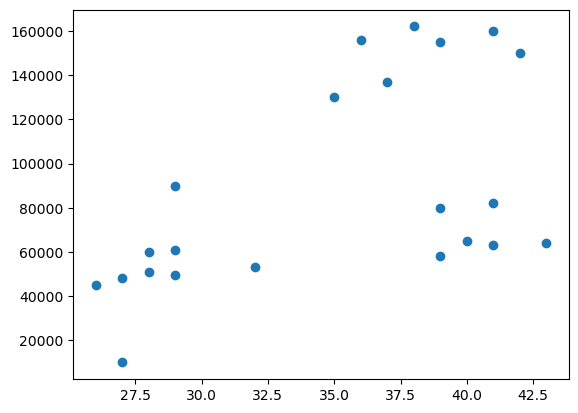

In [5]:
plt.scatter(df['Age'],df['Income($)'])

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
df['clusters']=y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,27,10000,2
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [9]:
import seaborn as sns

<Figure size 1000x5000 with 0 Axes>

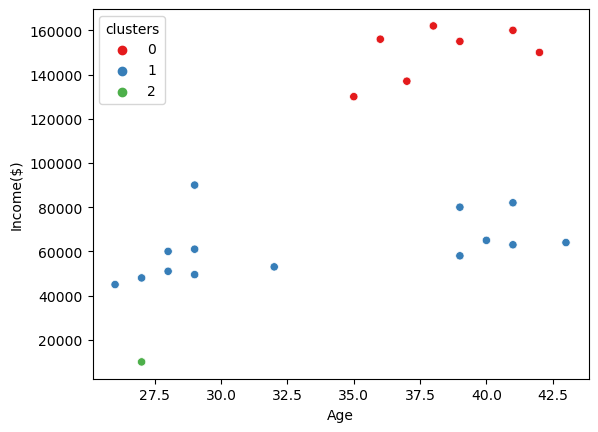

<Figure size 1000x5000 with 0 Axes>

In [10]:
sns.scatterplot(x='Age',y='Income($)',data=df,hue=df['clusters'],palette='Set1')
plt.figure(figsize=(10,50))

In [34]:
(df['Income($)']-df['Income($)'].mean())/df['Income($)'].std()

0    -1.666866
1     0.049241
2    -0.572848
3    -0.594299
4     1.336321
5     1.443577
6     1.550834
7     1.593737
8     1.465029
9     0.907294
10    1.057453
11   -0.916069
12   -0.851715
13   -0.787361
14   -0.819538
15   -0.744459
16   -0.487043
17   -0.529945
18   -0.508494
19   -0.165273
20   -0.122370
21   -0.637202
Name: Income($), dtype: float64

In [11]:
df.head()

,Name,Age,Income($),clusters
0,Rob,27,10000,2
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [14]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),clusters,cluster
0,Rob,27,10000,2,2
1,Michael,29,90000,1,1
2,Mohan,29,61000,1,1
3,Ismail,28,60000,1,1
4,Kory,42,150000,0,0


In [18]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

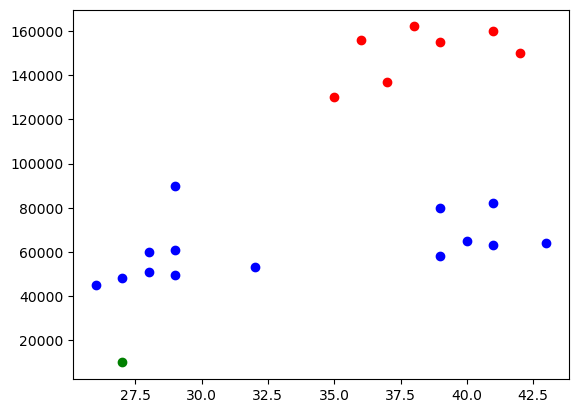

In [23]:
plt.scatter(df1['Age'],df1['Income($)'],color="red")
plt.scatter(df2['Age'],df2['Income($)'],color="blue")
plt.scatter(df3['Age'],df3['Income($)'],color="green")
plt.show()

In [30]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
sse

[45636330276.727264,
 5794233941.161905,
 3260089852.3571424,
 1430045993.5497835,
 667745978.9212122,
 239333671.3333333,
 174800337.7,
 120800257.03333333,
 92633459.7]

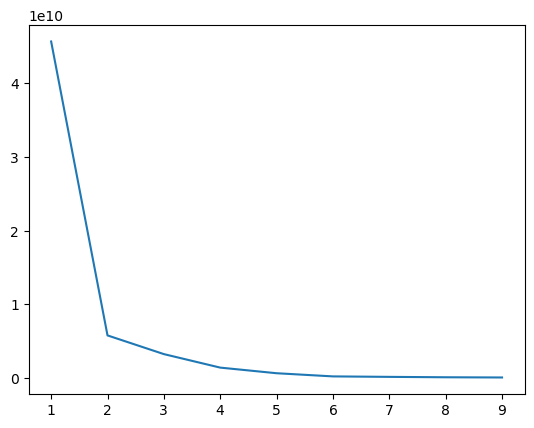

In [34]:
plt.plot(k_rng,sse)

K nearest

In [36]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [38]:
dataset=pd.read_csv('KNN_Dataset.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [41]:
for column in zero_not_accepted:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=dataset[column].mean(skipna=True)
    dataset[column]=dataset[column].replace(np.NaN, mean)

In [42]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [44]:
X=dataset.iloc[:,0:8]
y=dataset.iloc[:,8]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
scaler=StandardScaler()

In [47]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [50]:
import math
math.sqrt(len(y_test))
#nombre de k neighbors - 1 (le votant) on a donc 11 

12.409673645990857

In [51]:
classifier=KNeighborsClassifier(n_neighbors=11,metric="euclidean")

In [52]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [54]:
y_pred=classifier.predict(X_test)
y_pred

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [57]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[95, 12],
       [18, 29]], dtype=int64)

In [58]:
f1_score(y_test,y_pred)

0.6590909090909092

In [59]:
accuracy_score(y_test,y_pred)

0.8051948051948052

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 640x480 with 0 Axes>

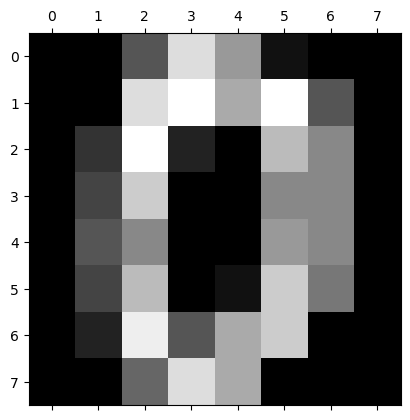

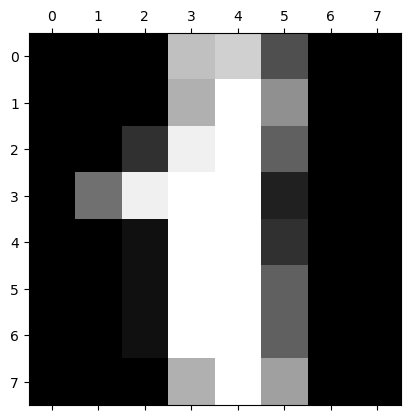

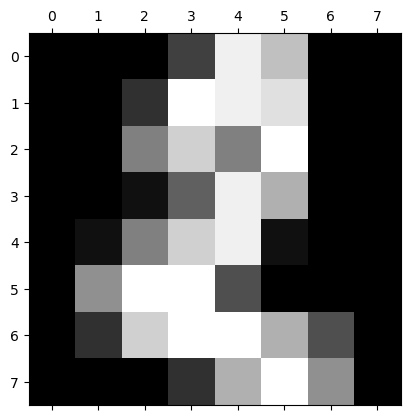

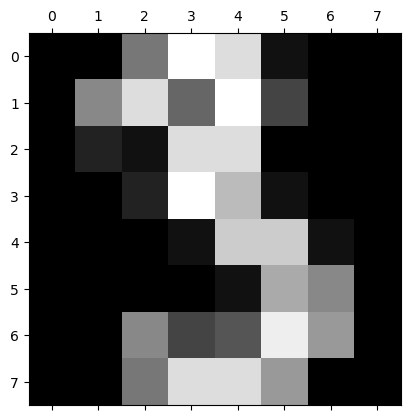

In [5]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(columns='target'),df['target'],test_size=0.2)

In [13]:
y_train.head()

756    4
469    3
591    2
855    0
650    4
Name: target, dtype: int32

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model=RandomForestClassifier(n_estimators=20)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [25]:
model.score(X_test,y_test)

0.9527777777777777

In [26]:
y_predicted=model.predict(X_test)

In [27]:
import seaborn as sns

In [28]:
from sklearn.metrics import confusion_matrix

In [31]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[40,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1, 32,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 37,  2],
       [ 0,  1,  0,  0,  0,  1,  0,  1,  0, 32]], dtype=int64)

<AxesSubplot:>

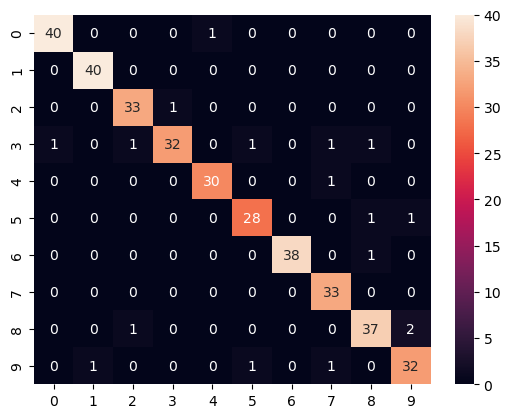

In [41]:
sns.heatmap(cm,annot=True)